<a href="https://colab.research.google.com/github/ShivinM-17/Audio-signal-processing-python/blob/main/Fourier_tranform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necessary libraries

In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

### Load the audio file using librosa

In [2]:
audio_path = "/content/piano_c.wav"
ipd.Audio(audio_path)

In [3]:
# load the audio file using librosa
signal, sr = librosa.load(audio_path)

In [5]:
# Getting the sampling rate
sr

22050

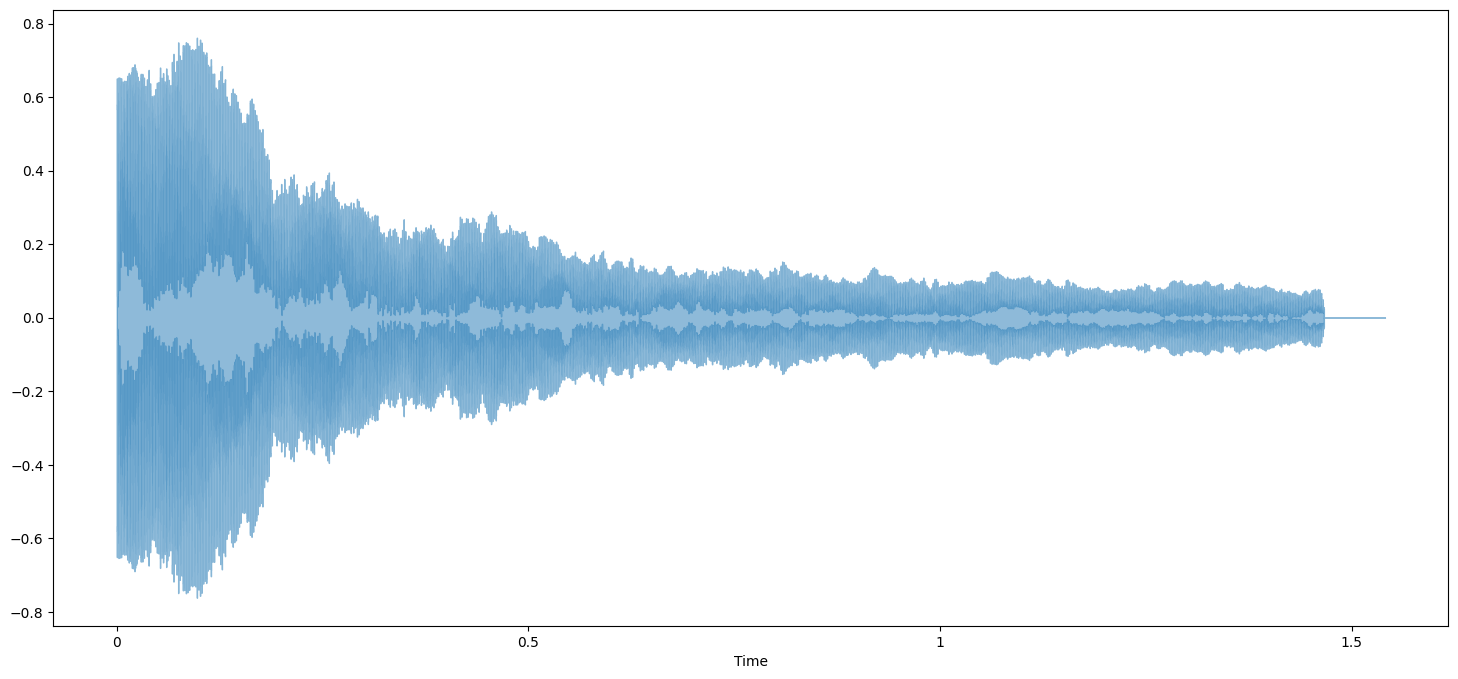

In [6]:
# plotting the waveform
plt.figure(figsize=(18,8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

Here, the plot we have is in Time-domain

### Deriving spectrum using FT

In [9]:
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

In [10]:
ft

array([-42.619125 -0.j       , -34.297115 +6.560215j ,
       -29.963585 +7.4250374j, ..., -27.411749-12.946169j ,
       -29.963585 -7.4250374j, -34.297115 -6.560215j ], dtype=complex64)

In [15]:
magnitude, max(magnitude), min(magnitude), len(magnitude)

(array([42.619125, 34.918884, 30.86985 , ..., 30.315132, 30.86985 ,
        34.918884], dtype=float32),
 2167.6487,
 0.001862542,
 33968)

In [16]:
frequency, len(frequency)

(array([0.00000000e+00, 6.49159478e-01, 1.29831896e+00, ...,
        2.20487017e+04, 2.20493508e+04, 2.20500000e+04]),
 33968)

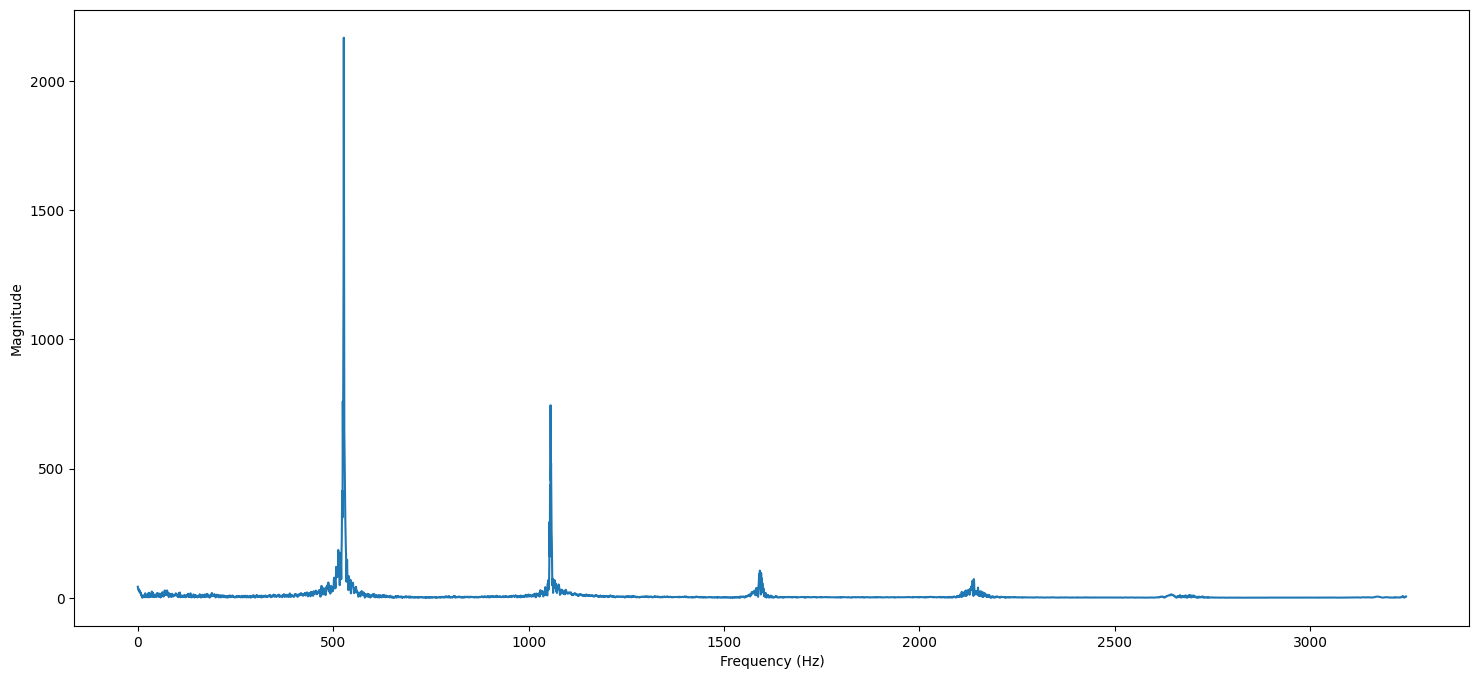

In [21]:
# plotting the spectrum
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

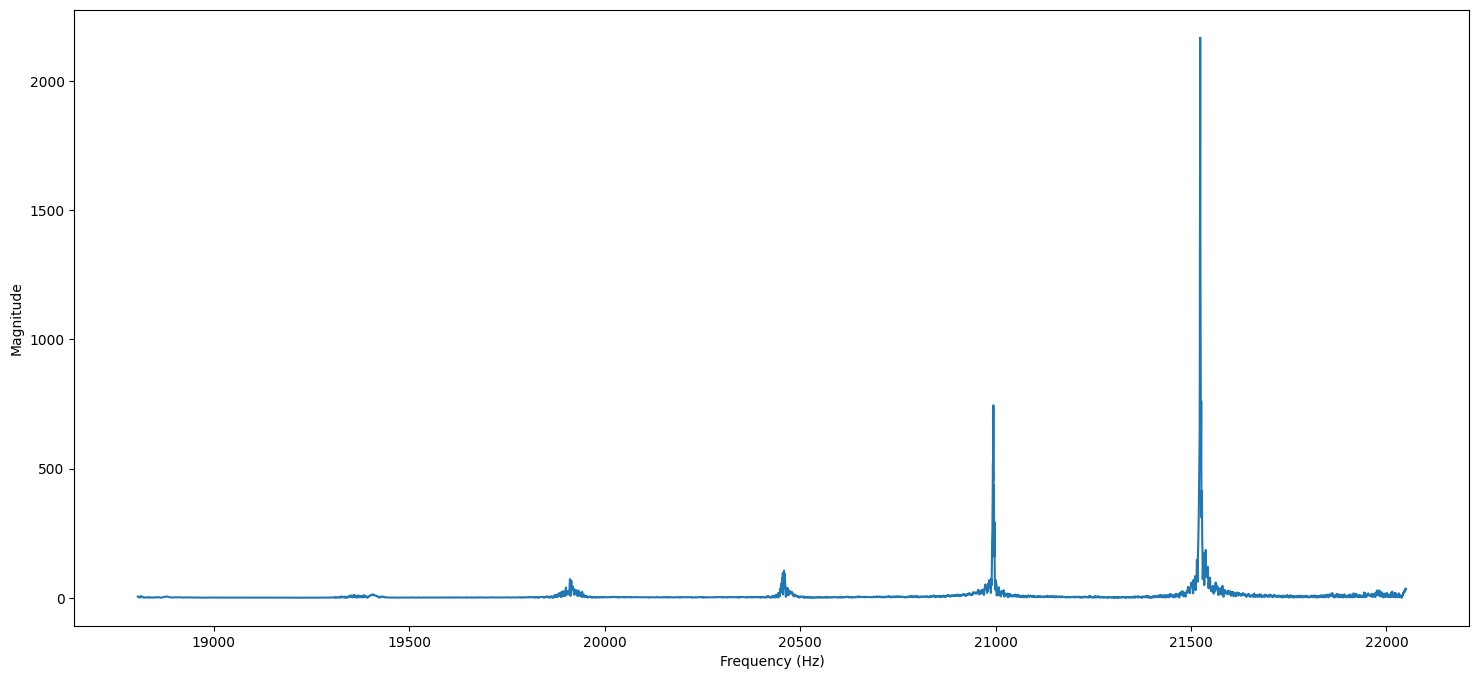

In [22]:
# plotting the spectrum
plt.figure(figsize=(18,8))
plt.plot(frequency[-1:-5000:-1], magnitude[-1:-5000:-1]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [23]:
# length of the signal
len(signal)

33968

In [25]:
# duration of each sample
duration = 1/sr
duration

4.5351473922902495e-05

In [26]:
# duration of sr = 523
duration_523 = 1/523

In [28]:
# duration of 400 samples
d_400_samples = duration*400
d_400_samples

0.018140589569160998

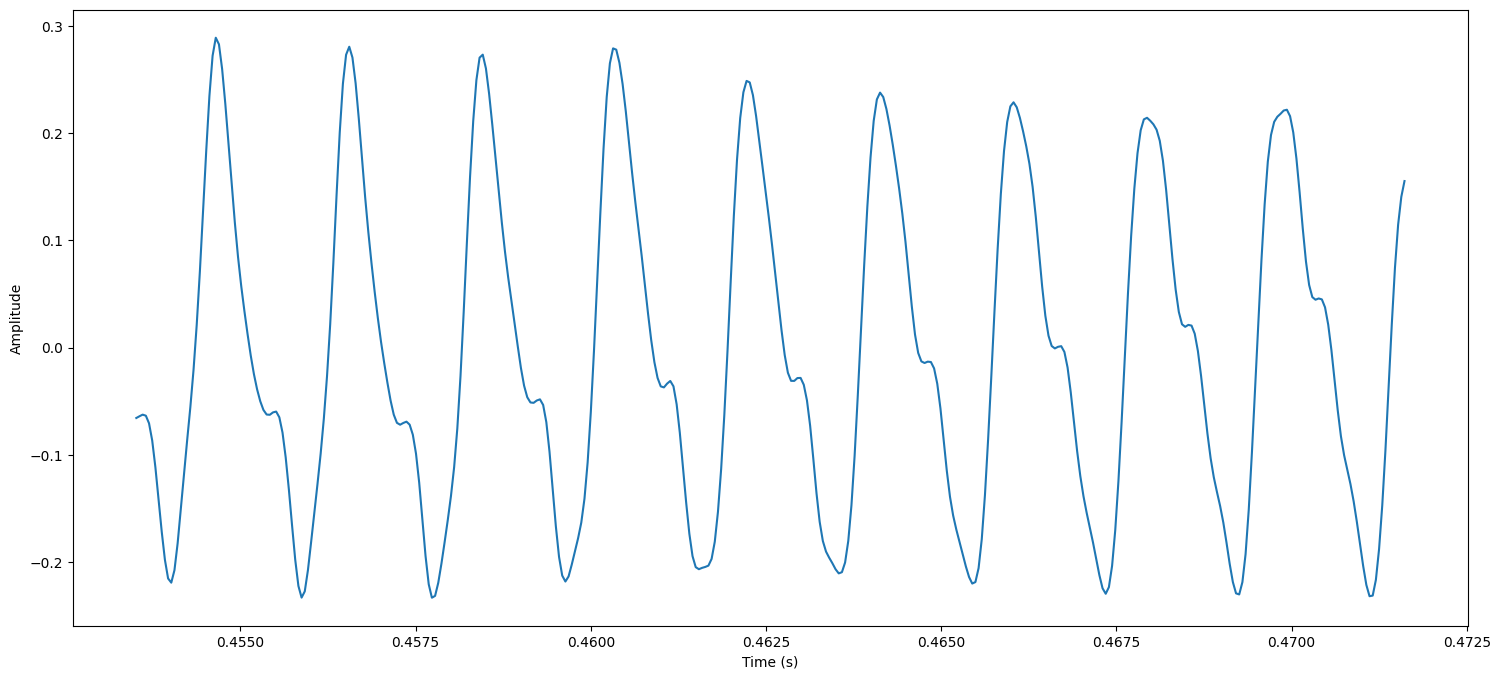

In [29]:
## Zooming in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

we won't the compare these signals with sinusoids, and check out the similarities with them

[ 0.          0.07423935  0.14683291 ... -0.31810782 -0.37185828
 -0.4173651 ]
[-6.12323400e-17 -7.42393520e-02 -1.46832907e-01 ...  3.18107816e-01
  3.71858282e-01  4.17365099e-01]


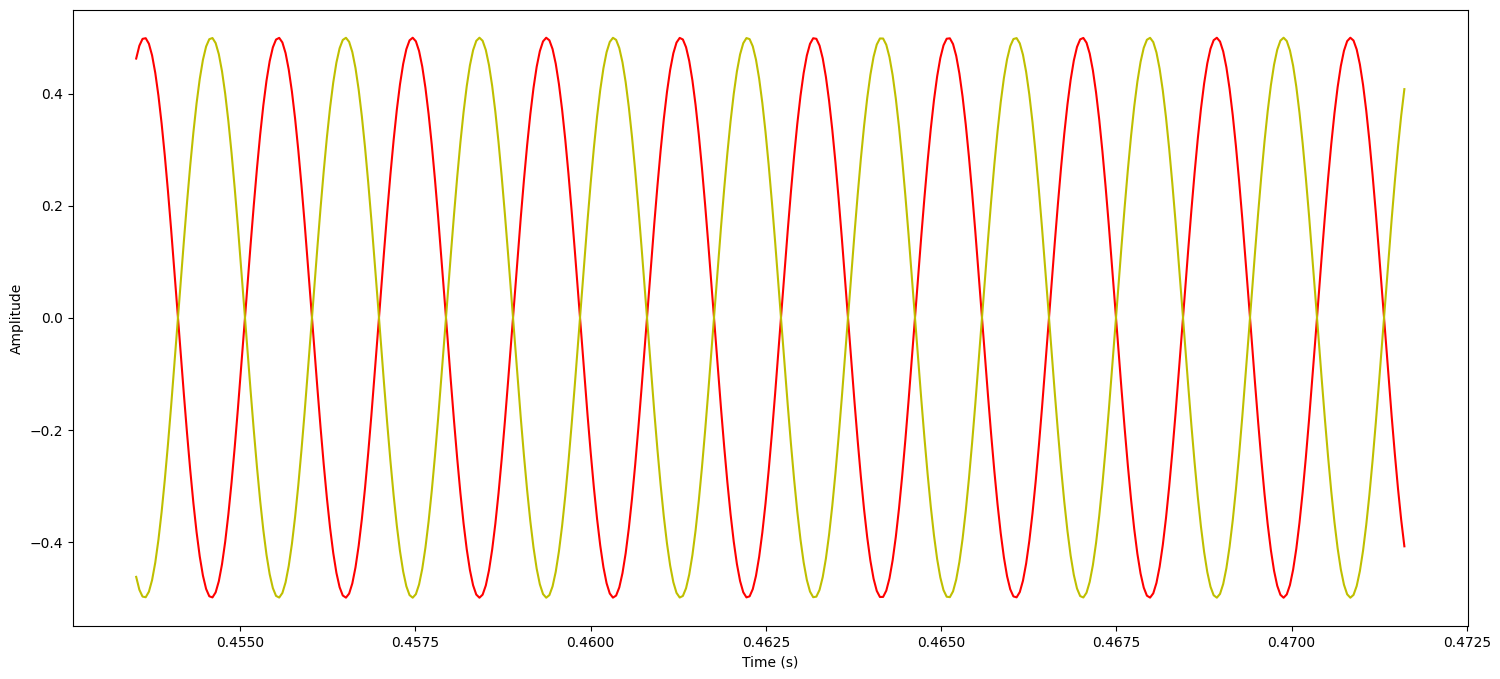

In [38]:
# create a sinusoid
f = 523 # fundamental frequency (Hz)
phase1 = 0
phase2 = 0.5

sin1 = 0.5 * np.sin(2 * np.pi * (f * t - phase1))
sin2 = 0.5 * np.sin(2 * np.pi * (f * t - phase2))
print(sin1)
print(sin2)

# Plotting sinusoids with different phases
plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], sin1[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

[0.0309017  0.01643801 0.00160991 ... 0.03666669 0.05007401 0.06237126]


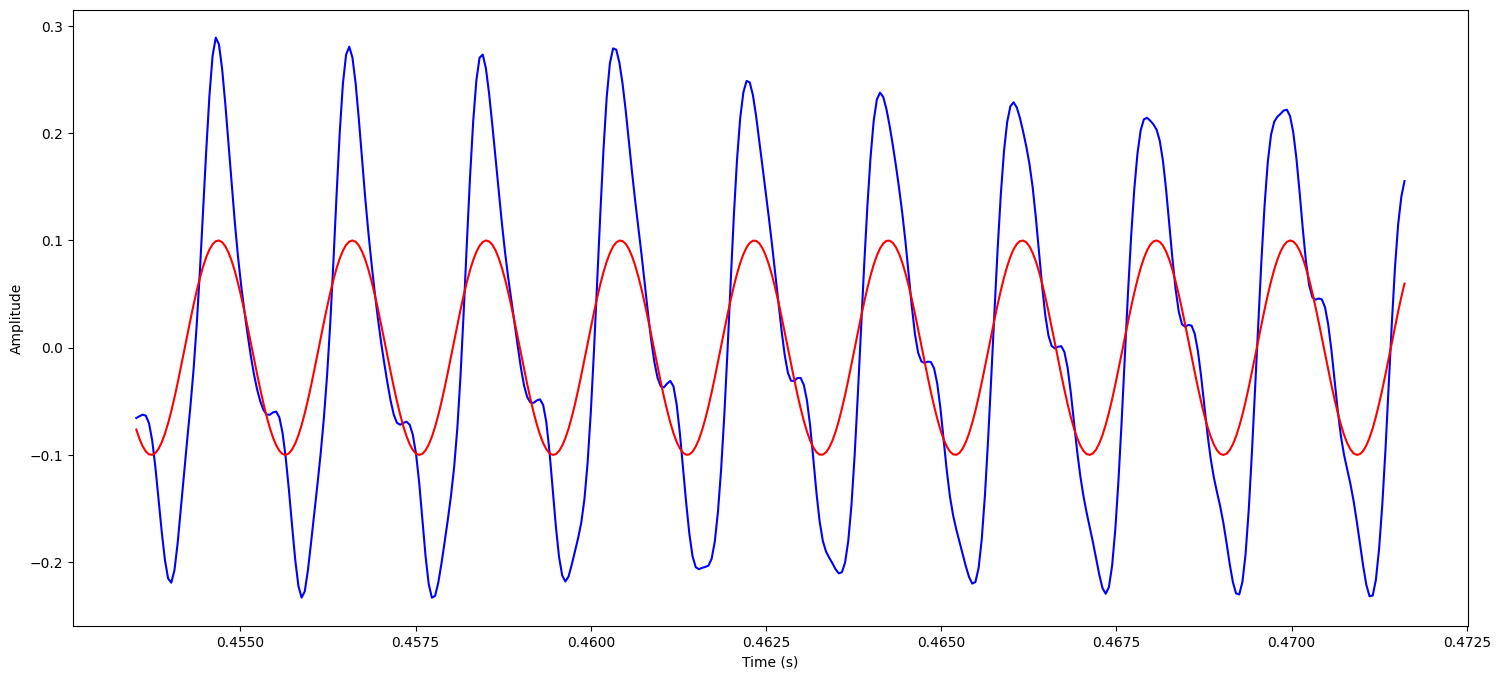

In [43]:
# compare signal and sinusoids
f = 523 # fundamental frequency (Hz)
phase = 0.55

sin = 0.1 * np.sin(2 * np.pi * (f * t - phase))
print(sin)

# Plotting sinusoids with different phases
plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400], color="b")
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

**How do we calculate similarities between two waves?**

Combine the two signals by multiplying them, sample by sample (point to point). Then, we look at the positive areas, and we add them. Then we subtract the negative areas.

[0.0309017  0.01643801 0.00160991 ... 0.03666669 0.05007401 0.06237126]


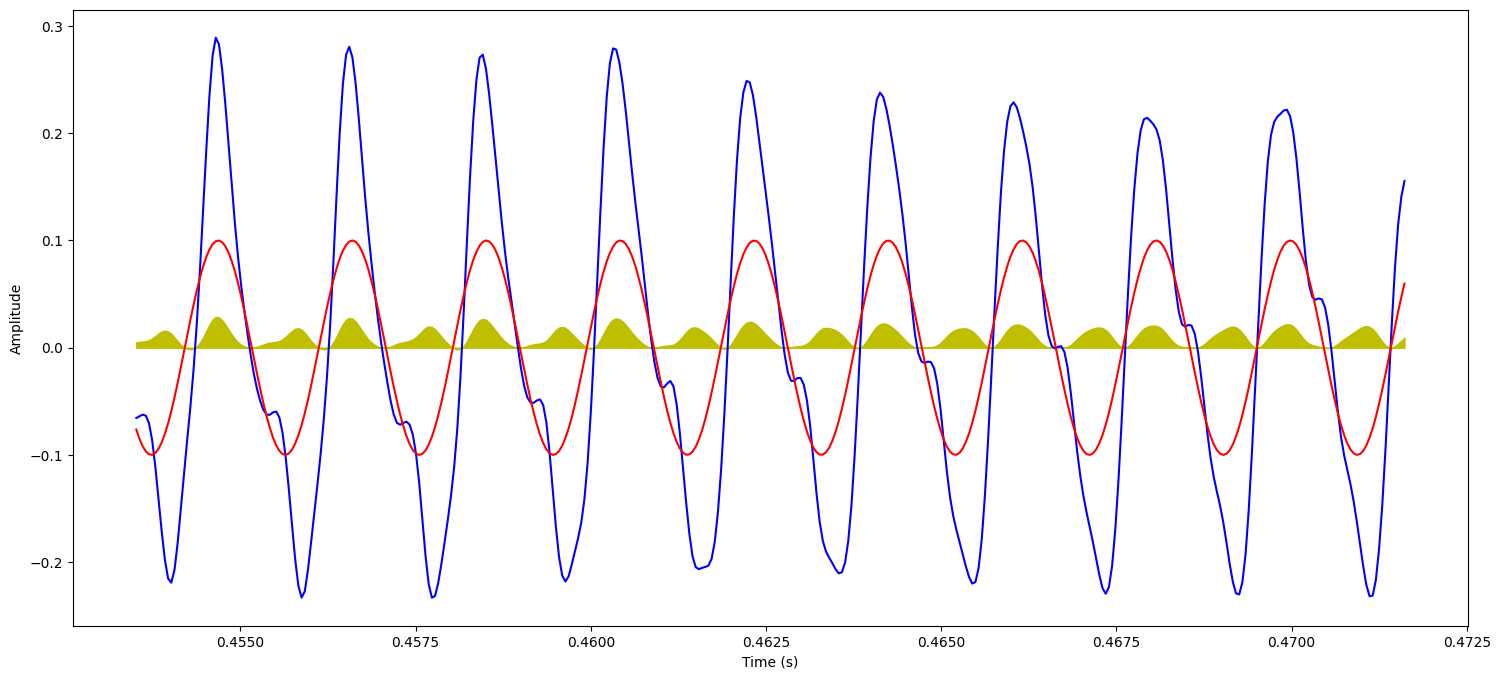

In [46]:
# compare signal and sinusoids
f = 523 # fundamental frequency (Hz)
phase = 0.55

sin = 0.1 * np.sin(2 * np.pi * (f * t - phase))
print(sin)

# Plotting sinusoids with different phases
plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400], color="b")
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color='y')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Here, since the waves are very much similar, therefore we are getting positive areas at all points

[-0.08305959 -0.09040734 -0.09575087 ...  0.09951071  0.09694069
  0.09222161]


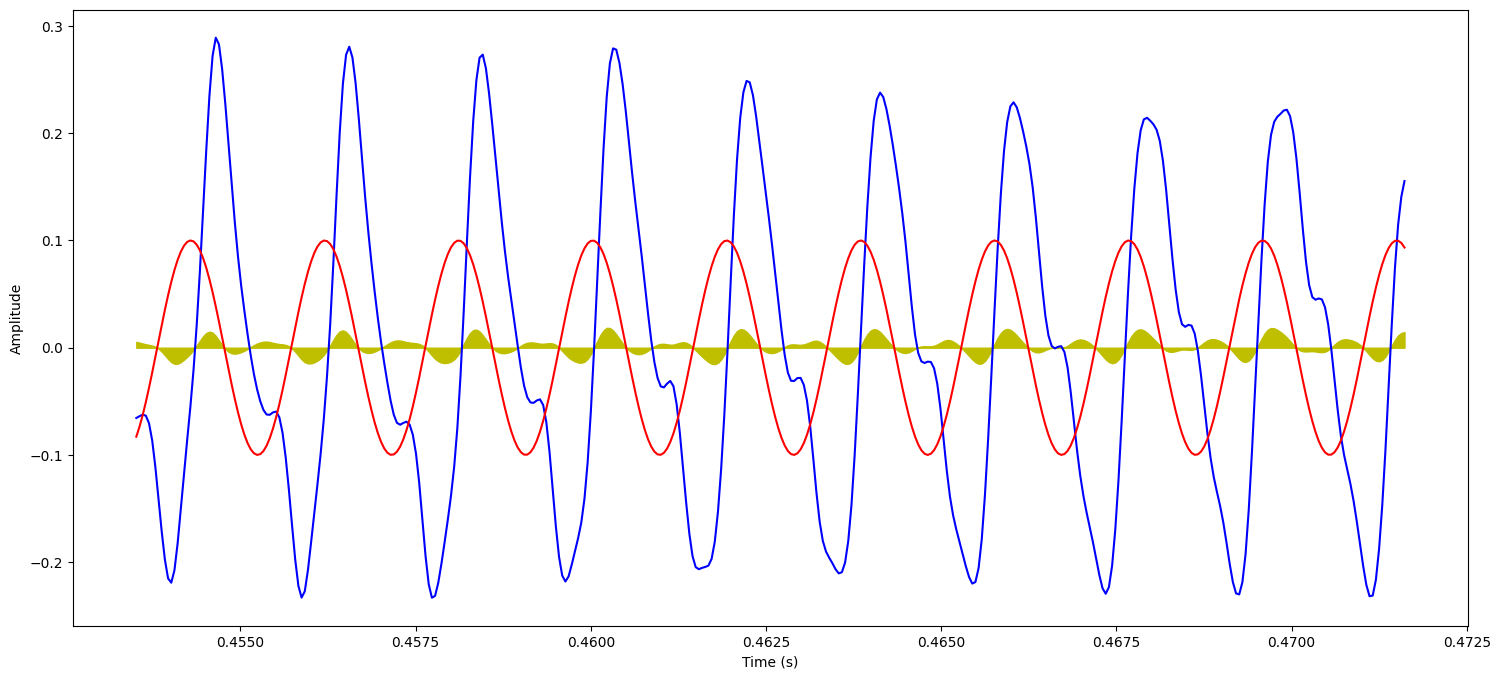

In [47]:
# compare signal and sinusoids
f = 523 # fundamental frequency (Hz)
phase = 0.344

sin = 0.1 * np.sin(2 * np.pi * (f * t - phase))
print(sin)

# Plotting sinusoids with different phases
plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400], color="b")
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color='y')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Here, only at some places, the signals are similar, thus we get both positive and negative areas at different points

[ 0.          0.01484787  0.02936658 ... -0.06362156 -0.07437166
 -0.08347302]


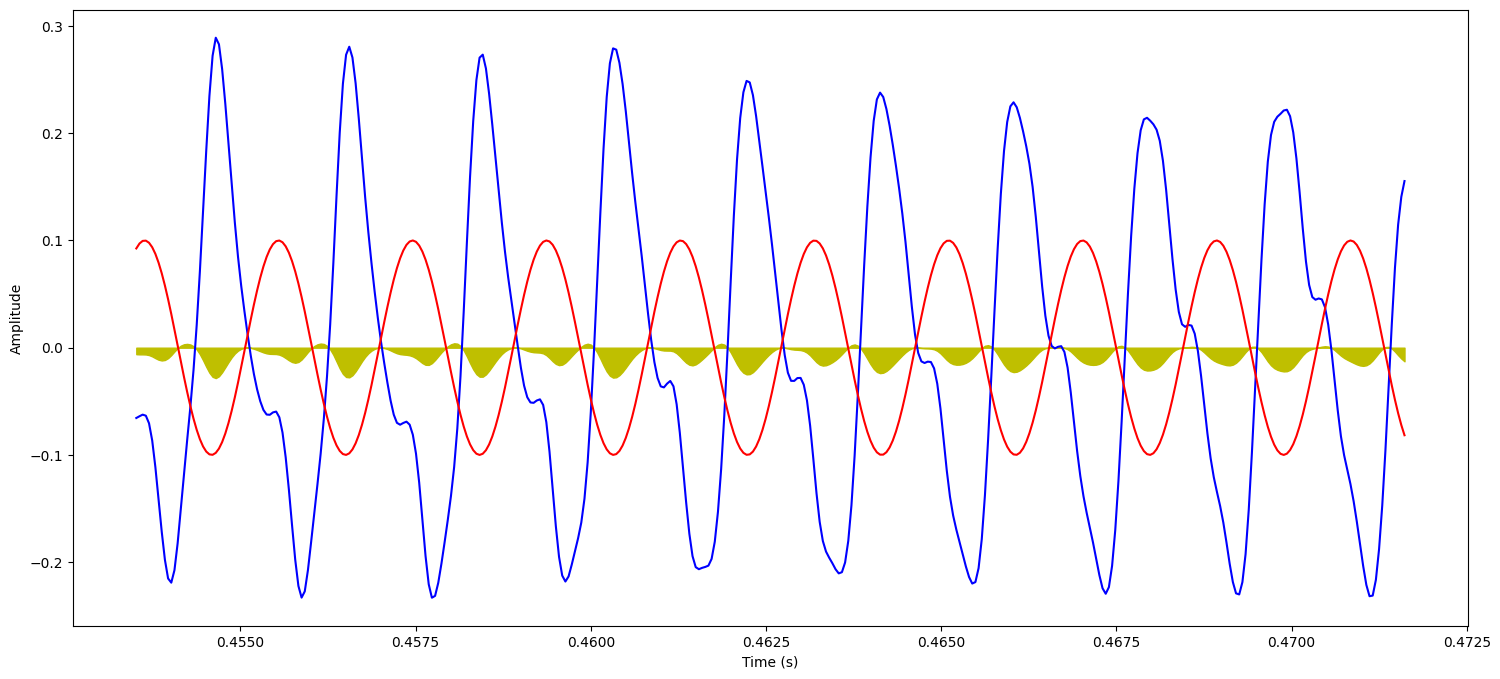

In [48]:
# compare signal and sinusoids
f = 523 # fundamental frequency (Hz)
phase = 0

sin = 0.1 * np.sin(2 * np.pi * (f * t - phase))
print(sin)

# Plotting sinusoids with different phases
plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400], color="b")
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color='y')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Since the signals are not at all similar to each other, therefore we get negative areas at all points, indicating the signals to be not similar

**The higher the area between the signals, the higher the similarities between the signals**